In [1]:
from jupiter import Moons
import pandas as pd
import numpy as np

In [2]:
# Create an instance of Moons, providing the path to your database file
moons = Moons(data = "jupiter.db")

In [3]:
# Call the load_data method to load the data into the DataFrame
moons.load_data()

               period_days  distance_km  radius_km    mag       mass_kg  \
moon                                                                      
Adrastea          0.298000     129000.0       8.20    NaN           NaN   
Aitne           730.000000   23231000.0       1.50  22.70           NaN   
Amalthea          0.498000     181400.0      83.50  14.10  2.080000e+18   
Ananke          630.000000   21300000.0      14.00  18.90           NaN   
Aoede           761.000000   24000000.0       2.00  22.50           NaN   
Arche           724.000000   22931000.0       1.50  22.80           NaN   
Autonoe         719.000000   23039000.0       2.00  22.00           NaN   
Callirrhoe      787.000000   24583090.0       4.80  20.80           NaN   
Callisto         16.689018    1882700.0    2410.30   5.65  1.075938e+23   
Carme           693.000000   22579850.0      23.35  18.90           NaN   
Carpo           456.000000   16989000.0       1.50  23.00           NaN   
Chaldene        760.00000

Printing out summary allows us to get a general overview of the dataset column titles and what dtype they contain

In [4]:
moons.summary()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, Adrastea to Thyone
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   period_days      56 non-null     float64
 1   distance_km      56 non-null     float64
 2   radius_km        56 non-null     float64
 3   mag              53 non-null     float64
 4   mass_kg          6 non-null      float64
 5   group            56 non-null     object 
 6   ecc              56 non-null     float64
 7   inclination_deg  56 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.9+ KB


In [5]:
moons.summary_stats()

,period_days,distance_km,radius_km,mag,mass_kg,ecc,inclination_deg
count,56.000000,5.600000e+01,56.000000,53.000000,6.000000e+00,56.000000,56.000000
mean,525.998146,1.775655e+07,158.969643,20.418302,6.551798e+22,0.222922,113.571607
std,272.670243,8.253688e+06,557.730632,4.926587,6.010469e+22,0.126899,64.562822
min,0.290000,1.280000e+05,1.000000,4.610000,2.080000e+18,0.000200,0.030000
25%,258.750000,1.170252e+07,1.500000,20.800000,1.200276e+22,0.159201,30.582500
50%,632.500000,2.129009e+07,2.000000,22.500000,6.865891e+22,0.228000,148.600000
75%,725.500000,2.336375e+07,11.562500,23.000000,1.030252e+23,0.298858,159.175000
max,787.000000,2.458309e+07,2634.100000,23.700000,1.481900e+23,0.611016,166.200000


Pairplot shows all pairwise relationships between the columns allows us to find which columns are correlated with one another.

/Users/chideravictor/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


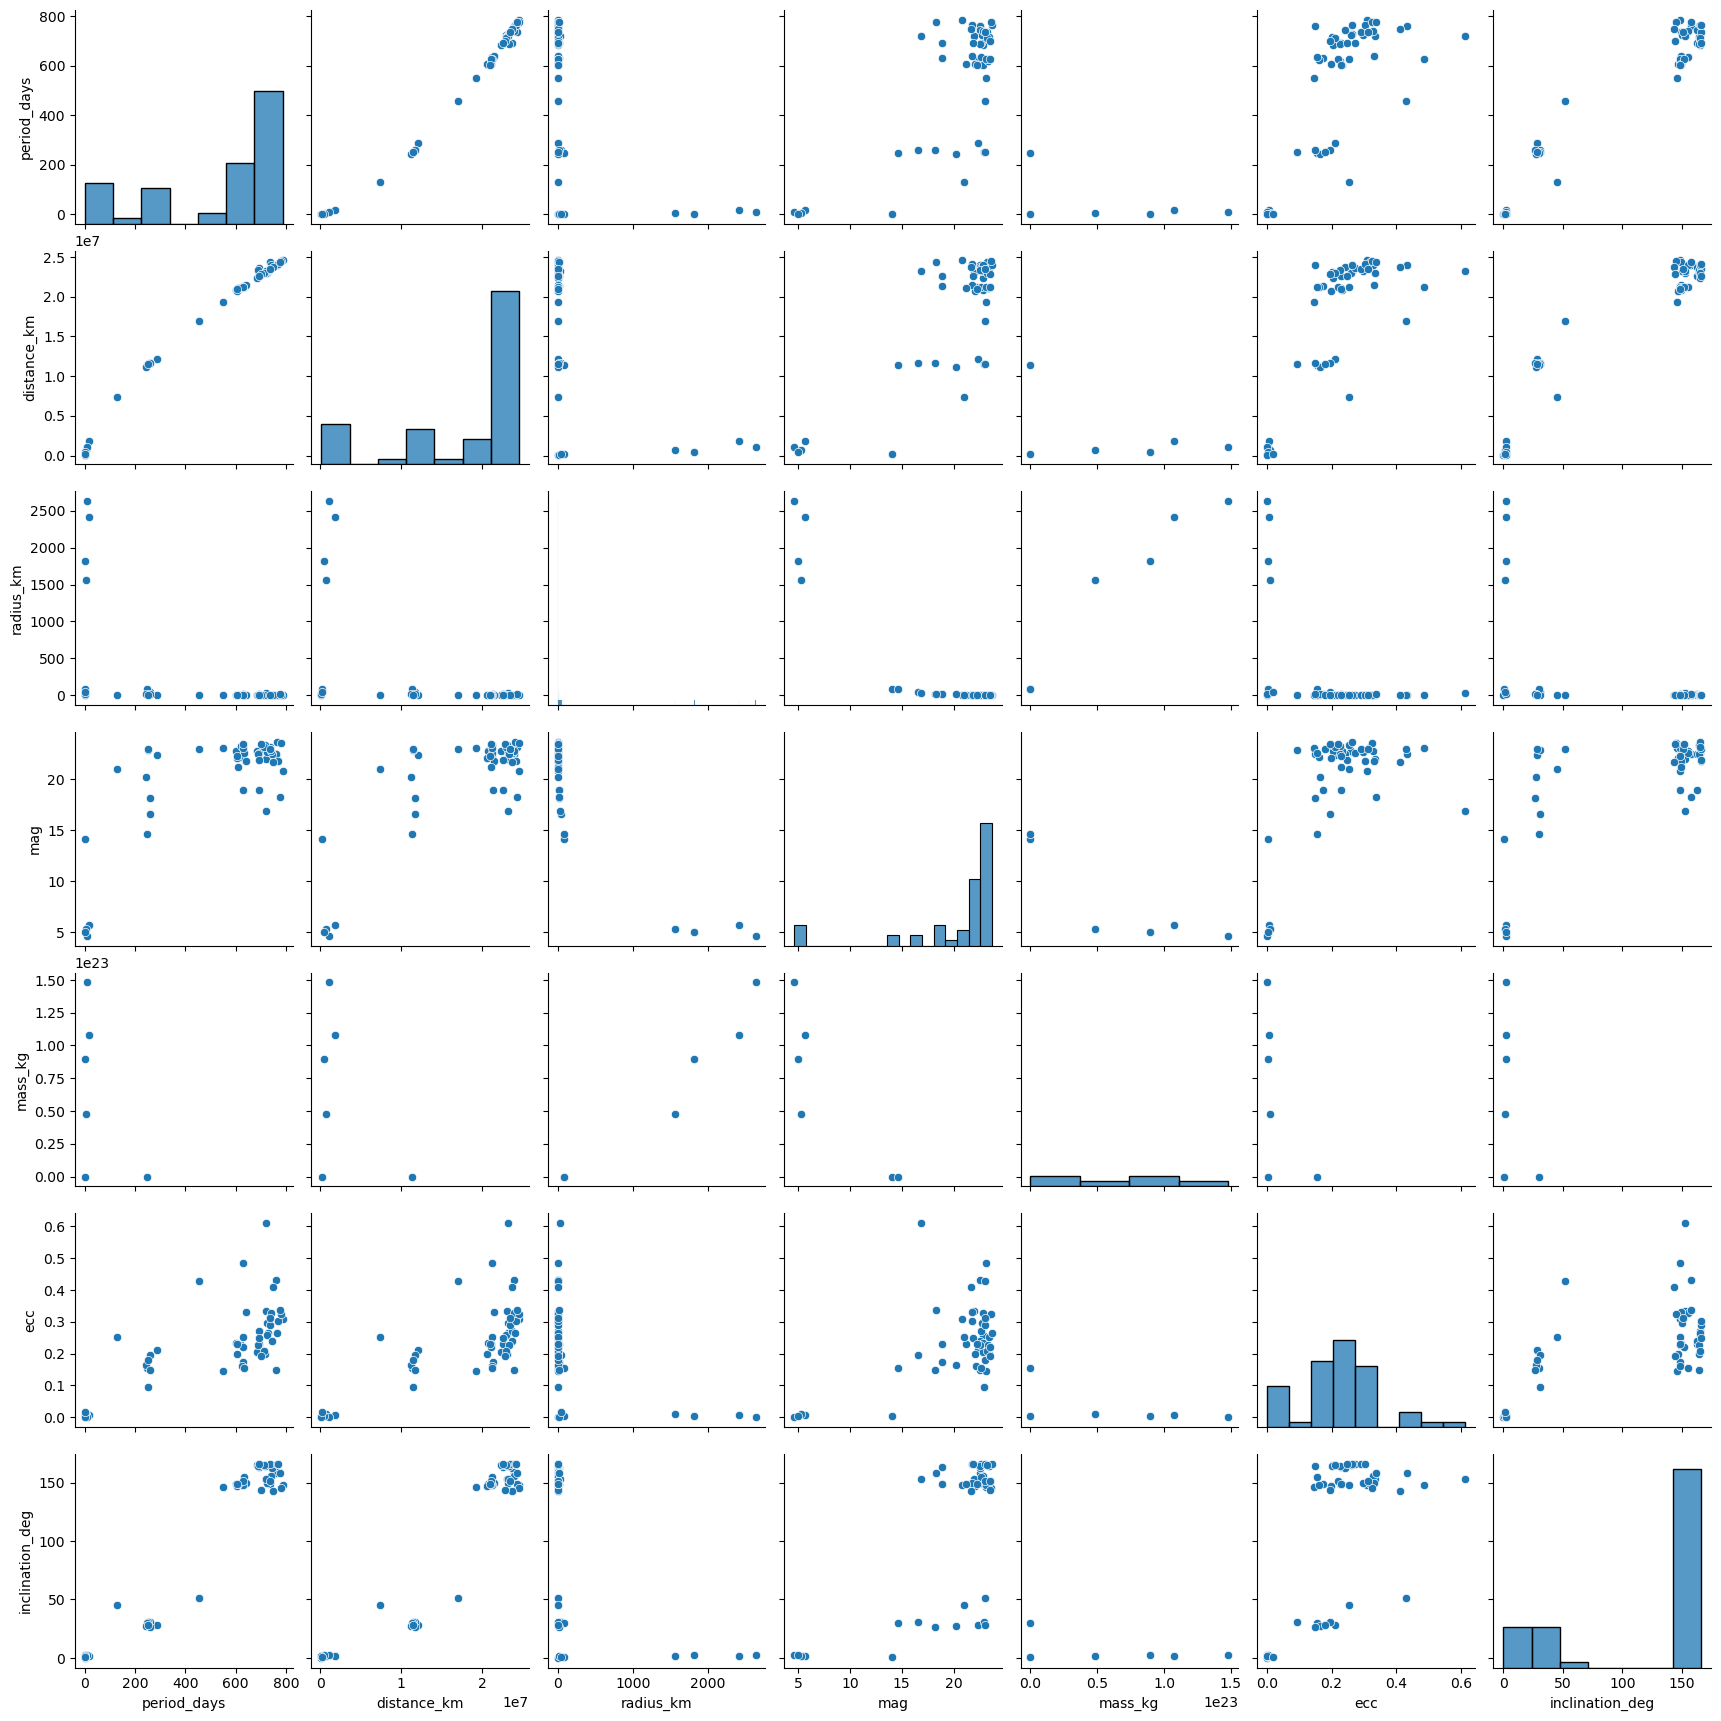

In [6]:
moons.plot_pair()

The correlations method allows us to look more closely into the pairwise relationships that seem to have a clear trend from the above. The closer the number is to 1 the more highly correlated the variables are.

In [7]:
moons.correlations("ecc", "inclination_deg")

,ecc,inclination_deg
ecc,1.000000,0.645961
inclination_deg,0.645961,1.000000


In [8]:
moons.correlations("mag", "ecc")

,mag,ecc
mag,1.000000,0.554617
ecc,0.554617,1.000000


In [9]:
moons.correlations("radius_km", "mass_kg")

,radius_km,mass_kg
radius_km,1.000000,0.968379
mass_kg,0.968379,1.000000


In [10]:
moons.correlations("distance_km", "inclination_deg")

,distance_km,inclination_deg
distance_km,1.000000,0.953873
inclination_deg,0.953873,1.000000


We can see for example that distance and inclination degree are very highly correlated.

In [11]:
moons.correlations("distance_km", "mag")

,distance_km,mag
distance_km,1.000000,0.799187
mag,0.799187,1.000000


In [12]:
moons.correlations("distance_km", "ecc")

,distance_km,ecc
distance_km,1.000000,0.750819
ecc,0.750819,1.000000


In [13]:
moons.correlations("period_days", "inclination_deg")

,period_days,inclination_deg
period_days,1.000000,0.969493
inclination_deg,0.969493,1.000000


In [14]:
moons.correlations("period_days", "ecc")

,period_days,ecc
period_days,1.000000,0.737181
ecc,0.737181,1.000000


In [15]:
moons.correlations("period_days", "distance_km")

,period_days,distance_km
period_days,1.000000,0.991521
distance_km,0.991521,1.000000


The most extremely correlated variables seem to be period v distance, period v inclinarion degree, distance v inclination degree, and radius v mass. With correlation values of approximately 0.9

Say you would like to look at data for specfic moons you can use the extract_moons( ) method to view the data for the set of moons

In [16]:
#Extracts the data for the most well studied moons of jupiter
moons.extract_moons(["Callisto", "Europa", "Ganymede", "Io"])

,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
moon,,,,,,,,
Callisto,16.689018,1882700.0,2410.3,5.65,1.075938e+23,Galilean,0.0074,2.02
Europa,3.551181,670900.0,1560.8,5.29,4.799844e+22,Galilean,0.0090,1.79
Ganymede,7.150000,1070400.0,2634.1,4.61,1.481900e+23,Galilean,0.0013,2.20
Io,1.750000,421700.0,1821.6,5.02,8.931938e+22,Galilean,0.0041,2.20


Again looking at the most studied moons we saw above how correlated period and distance. So we can use the merge( ) to look into these columns specifically for your chosen set of moons

In [17]:
moons.merge(["period_days", "distance_km"], ["Callisto", "Europa", "Ganymede", "Io"])

,period_days,distance_km
moon,,
Callisto,16.689018,1882700.0
Europa,3.551181,670900.0
Ganymede,7.150000,1070400.0
Io,1.750000,421700.0


And can plot a scatter graph 

/Users/chideravictor/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


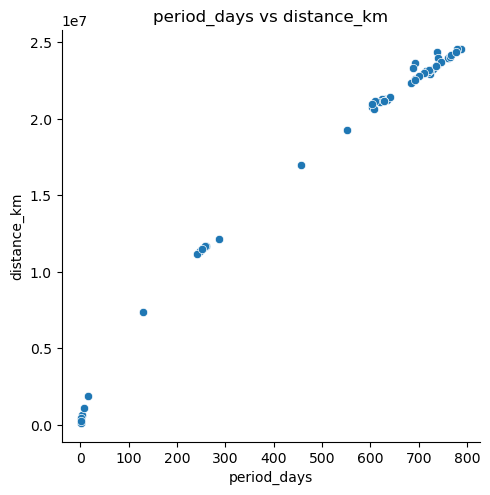

In [18]:
moons.plot_scatter("period_days", "distance_km")

We can also look into the categorigal day with the groups. The method below can be used to show all the data for moons in a specified group.

In [19]:
moons.print_groups("Inner")

Name: Inner 

          period_days  distance_km  radius_km   mag       mass_kg  group  \
moon                                                                       
Adrastea        0.298     129000.0        8.2   NaN           NaN  Inner   
Amalthea        0.498     181400.0       83.5  14.1  2.080000e+18  Inner   
Metis           0.290     128000.0       21.5   NaN           NaN  Inner   
Thebe           0.670     221889.0       49.0   NaN           NaN  Inner   

              ecc  inclination_deg  
moon                                
Adrastea  0.00150             0.03  
Amalthea  0.00319             0.37  
Metis     0.00020             2.00  
Thebe     0.01750             1.10  


From this we can plot categorical plots such as histograms, box plots and bar charts against the 'group' column of the data

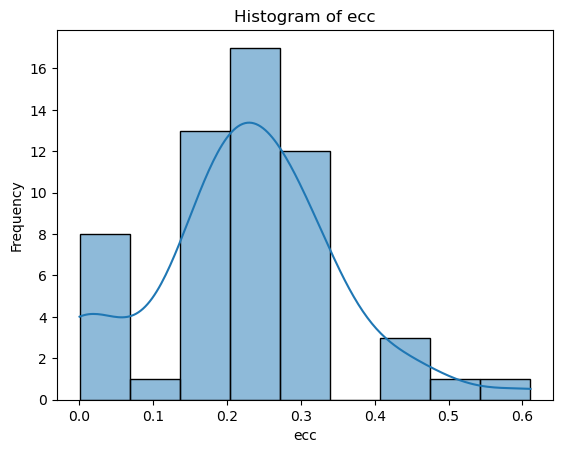

In [20]:
moons.plot_hist("ecc")

From this histogram we can see that the most commeon eccentricity occurs between 0.2 to 0.3

/Users/chideravictor/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


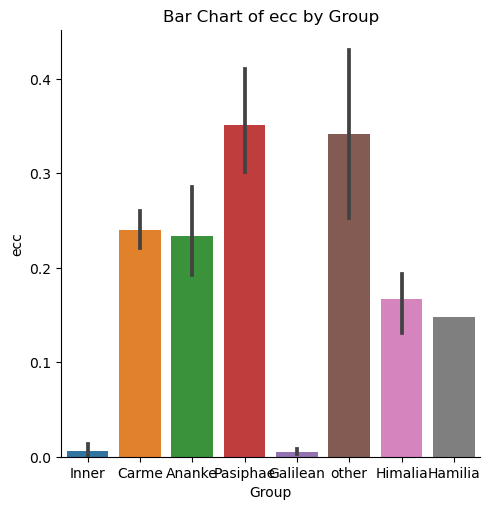

In [21]:
moons.plot_bar("ecc")

/Users/chideravictor/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


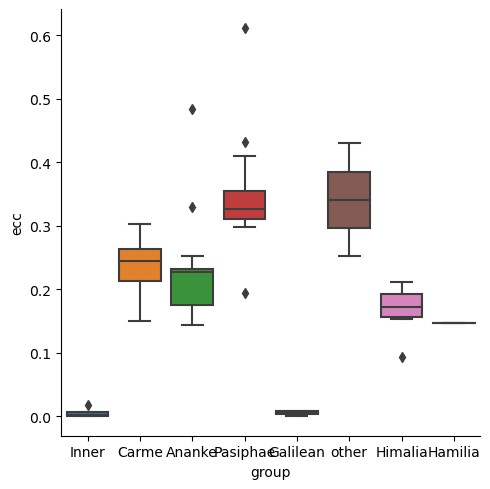

In [22]:
moons.plot_box("ecc")

Task 2: Perfoming Regression model

Using Keplers laws we know that Orbital period, T^2, is directly proportional to the length of the semi-major axis, a^3 of its orbit.

So in order to be able to visualise this we have to convert units and create new columns in the data frame using the convert_units( ) method. As well as the raise_power( ) method to raise an entire column to the same power and add this as a new column to the data frame.

In [23]:
moons.convert_units("distance_km", "distance_m", "km_to_m")

In [24]:
moons.convert_units("period_days", "period_secs", "days_to_secs")

In [25]:
moons.raise_power("period_secs", "T_squared", 2)

In [26]:
moons.raise_power("distance_km", "A_cubed", 3)

In [27]:
#Confirm that the new columns have been added
print(moons.df)

               period_days  distance_km  radius_km    mag       mass_kg  \
moon                                                                      
Adrastea          0.298000     129000.0       8.20    NaN           NaN   
Aitne           730.000000   23231000.0       1.50  22.70           NaN   
Amalthea          0.498000     181400.0      83.50  14.10  2.080000e+18   
Ananke          630.000000   21300000.0      14.00  18.90           NaN   
Aoede           761.000000   24000000.0       2.00  22.50           NaN   
Arche           724.000000   22931000.0       1.50  22.80           NaN   
Autonoe         719.000000   23039000.0       2.00  22.00           NaN   
Callirrhoe      787.000000   24583090.0       4.80  20.80           NaN   
Callisto         16.689018    1882700.0    2410.30   5.65  1.075938e+23   
Carme           693.000000   22579850.0      23.35  18.90           NaN   
Carpo           456.000000   16989000.0       1.50  23.00           NaN   
Chaldene        760.00000

To check that the relationship is linear we can plot a scatter graph using the plot_scatter( ) method

/Users/chideravictor/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


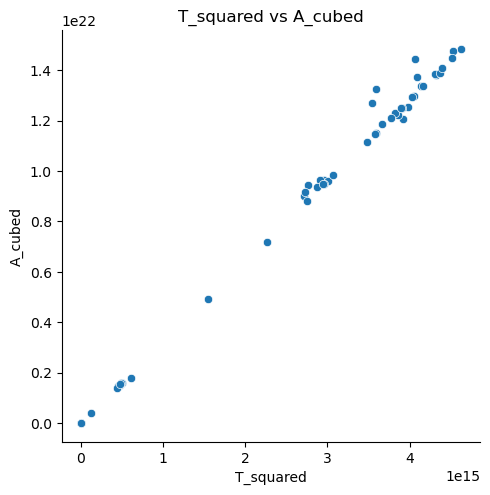

In [28]:
moons.plot_scatter("T_squared", "A_cubed")

We can see that a linear model is appropriate for this relationship based on the scatter plot above

Having done this we can then implement the linear_reg_model( ) method that uses hyper parameter of fit_intercept = True. As most linear models are in the form y=mx+c. We set fit intecerpt to true as that way we can use the model generally and is more reusable. Rather than forcing the regression line to pass through the origin.

The method returns the plot for residuals (the difference between actual and predicted values) as well as the a graph for the plot showing prediction values and test values on the same plot.

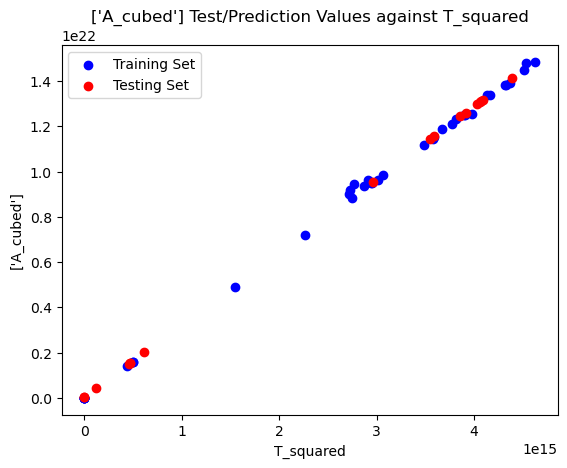

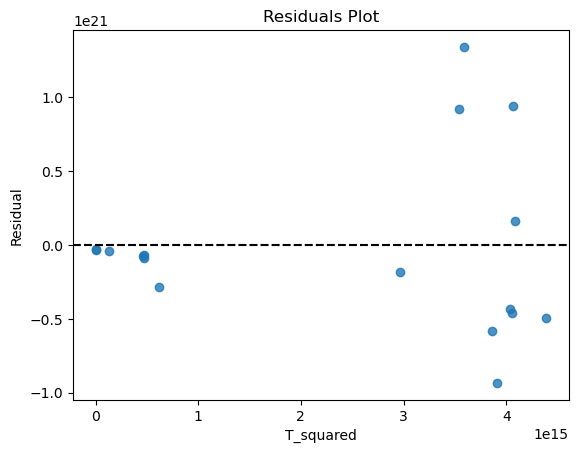

In [29]:
#Linear Regression Model
coefficient, y_test, y_pred = moons.linear_reg_model("T_squared", ["A_cubed"])

The residuals are random distributed around zero line which may suggest outliers or that the model is not missing any systematic information.

In [30]:
#Testing metrics
moons.testing_metrics(y_test, y_pred)

r2_score: 0.98835234753267
mean squared error: 4.097729283891058e+41
root mse: 6.401350860475512e+20


The r2 score suggests that the model explains 98% of the data. An indication of as strong correlation between predicted and actual values.

Both the MSE and root MSE values are quite large meaning that the model cannot accurately predict certain data points. 

In [31]:
# Estimating Jupiters mass
slope = coefficient
G_constant = 6.67e-11
estimated_mass = (4*(np.pi**2)) / (G_constant * slope) 

print(estimated_mass)

[184099.69627452]


My estimated mass of jupiter is off by 10 to the power of 22. As the actual value of the mass of jupiter is 1.898e+27, which suggests an error in my calculations or in the data itself.